# Project 2 - creating neural net from scratch

The objective of this project is to design a mini “deep learning framework” using only pytorch’s tensor operations and the standard math library, hence in particular without using autograd or the neural-network modules.

Your framework should import only `torch.FloatTensor` and `torch.LongTensor` from pytorch, and use no pre-existing neural-network python toolbox.


-------------
# /////////////TODO/////////////

- start on the report
- create plot of decisionline with model and data as input (for better debugging and insight)
- create Relu()-module
- create proper MSEloss()-module
- create train_model() or similar
- create split_dataset() or similar
- create the net they request

-------------------------------------
-------------------------------------

In [3]:
# Definitely allowed imports
import math
import torch
from torch import FloatTensor, LongTensor, Tensor
# additional imports
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


# our own written code
import helpers as HL

# jupyter magic
%load_ext autoreload
%autoreload 2

In [4]:
matplotlib.__version__

'2.1.2'

## Generate datasets

__Generate linear data__

torch.Size([1000, 2]) torch.Size([1000, 1])


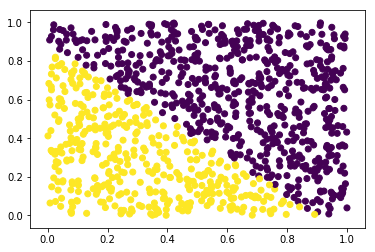

In [5]:
linear_inputs, linear_targets = HL.generate_linear_data()
print(linear_inputs.shape, linear_targets.shape)

# plot the data
plt.scatter(linear_inputs[:,0], linear_inputs[:,1], c=np.squeeze(linear_targets.numpy()))
plt.show()

__Generate a training and a test set of 1,000 points sampled uniformly in [0,1]2, each with a
label 0 if outside the disk of radius 1/ 2π and 1 inside__

torch.Size([1000, 2]) torch.Size([1000, 1])


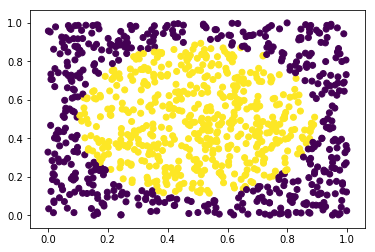

In [49]:
inputs, targets = HL.generate_disc_data(n=1000)
print(inputs.shape, targets.shape)

# plot the data
plt.scatter(inputs[:,0].numpy(), inputs[:,1].numpy(), c=np.squeeze(targets.numpy()))
plt.show()

## Build a network
...with `2` input units, `2` output units, `3` hidden layers of `25` units

Some modules may requires additional methods, and some modules may keep track of information
from the forward pass to be used in the backward.
You should implement at least the modules: `Linear` (fully connected layer), `ReLU` , `Tanh` , `Sequential`  to combine several modules in basic sequential structure, and LossMSE to compute the MSE loss.

## Split dataset

In [50]:
# comment out if you want non-linear dataset:
#inputs, targets = linear_inputs, linear_targets

# split the dataset into train and and test data
train_inputs, train_targets, test_inputs, test_targets = HL.split_dataset(inputs, targets, train_perc=0.7)
print(train_inputs.size(), train_targets.size(), test_inputs.size(), test_targets.size())

torch.Size([700, 2]) torch.Size([700, 1]) torch.Size([300, 2]) torch.Size([300, 1])


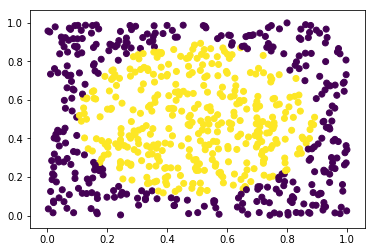

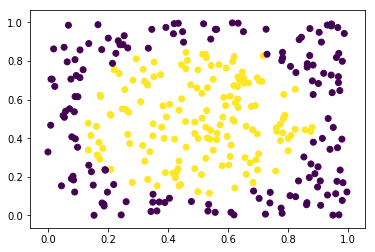

In [51]:
# plot the data
plt.scatter(train_inputs[:,0].numpy(), train_inputs[:,1].numpy(), c=np.squeeze(train_targets.numpy()))
plt.show()

plt.scatter(test_inputs[:,0].numpy(), test_inputs[:,1].numpy(), c=np.squeeze(test_targets.numpy()))
plt.show()

## Test the training Linear Regression

In [9]:
# useful information
nb_train_samples = train_inputs.size(0)
nb_classes = 2  # We want 2 classes in the end
input_dim = train_inputs.size(1)
print("nb_train_samples: ", nb_train_samples)
print("nb_classes: ", nb_classes)
print("input_dim: ", input_dim)

### Define model and optimizer
model = HL.Linear_Tanh_model(input_dim=input_dim, output_dim=nb_classes) # Performs well on linear data
#model = HL.Linear_regression_model(input_dim=input_dim, output_dim=nb_classes) # Performs well on linear data
#model = HL.Linear_Relu_model(input_dim=input_dim, output_dim=nb_classes, hidden_width = 25)
model = HL.Linear_TanhTanh_model(input_dim=input_dim, output_dim=nb_classes, hidden_width=25) # Performs well with circular data

### Train model
model, train_error_list, test_error_list = HL.train_model(train_inputs, train_targets, test_inputs, test_targets, 
                                                       model, learning_rate=0.001, epochs=300)

nb_train_samples:  700
nb_classes:  2
input_dim:  2
0 acc_train_loss 2050.15 acc_train_error 41.29% test_error 39.67%
30 acc_train_loss 426.87 acc_train_error 4.43% test_error 3.33%
60 acc_train_loss 296.49 acc_train_error 3.00% test_error 2.33%
90 acc_train_loss 242.10 acc_train_error 2.71% test_error 2.33%
120 acc_train_loss 210.60 acc_train_error 2.14% test_error 2.00%
150 acc_train_loss 189.29 acc_train_error 1.86% test_error 2.00%
180 acc_train_loss 173.48 acc_train_error 1.71% test_error 2.33%
210 acc_train_loss 161.02 acc_train_error 1.57% test_error 2.00%
240 acc_train_loss 150.80 acc_train_error 1.43% test_error 2.00%
270 acc_train_loss 142.17 acc_train_error 1.14% test_error 2.00%


## Run with Sequential

In [47]:
input_dim = 2
hidden_width = 25
output_dim = 2

### Linear
#model = HL.Sequential([HL.Linear(input_dim, output_dim)])

### Linear + Tanh
#model = HL.Sequential([HL.Linear(input_dim, output_dim), HL.Tanh()])


### Linear + Tanh + Linear + Tanh
model = HL.Sequential([HL.Linear(input_dim, hidden_width), HL.Tanh(), HL.Linear(hidden_width, output_dim), HL.Tanh()])

### Linear + Relu + Linear + Tanh
#model = HL.Sequential([HL.Linear(input_dim, hidden_width), HL.ReLu(), HL.Linear(hidden_width, output_dim), HL.Tanh()])

args
[<helpers.Linear object at 0x7f9559b9de80>, <helpers.Tanh object at 0x7f9559b9dfd0>]
module
module


In [48]:
model, train_error_list, test_error_list = HL.train_model(train_inputs, train_targets, test_inputs, test_targets, 
                                                       model, learning_rate=0.001, epochs=300)

0 acc_train_loss 1605.47 acc_train_error 38.29% test_error 40.67%
30 acc_train_loss 460.75 acc_train_error 5.00% test_error 6.67%
60 acc_train_loss 334.39 acc_train_error 3.00% test_error 4.00%
90 acc_train_loss 281.77 acc_train_error 1.86% test_error 3.33%
120 acc_train_loss 250.67 acc_train_error 1.29% test_error 2.67%
150 acc_train_loss 229.38 acc_train_error 1.29% test_error 2.67%
180 acc_train_loss 213.57 acc_train_error 1.14% test_error 1.67%
210 acc_train_loss 201.18 acc_train_error 1.14% test_error 1.33%
240 acc_train_loss 191.11 acc_train_error 1.00% test_error 1.33%
270 acc_train_loss 182.69 acc_train_error 1.00% test_error 1.33%
